In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


DATA_PATH = "./data"
TRAIN_DATA = os.path.join(DATA_PATH, "train.csv")


In [2]:
train_data = pd.read_csv(TRAIN_DATA)
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


=============================================================

**结合以上两部分，可以看出，数据总共包含12列，891条数据。其中：**

**PassengerId** 整型，标识乘客的ID，递增变量，对预测无帮助。

**Survived** 整型，标识乘客是否幸存。0表示遇难，1表示幸存；为预测类任务的label。

**Pclass** 整型，标识乘客的社会OR经济状态，1代表高级阶层，2代表中级阶层，3代表低级阶层。

**Name** 字符型，除包含姓和名以外，还包含Mr. Mrs. Dr.这样的具有西方文化特点的信息。

**Sex** 字符型，标识乘客性别。

**Age** 整型，标识乘客年龄，*有缺失值*。

**SibSp** 整型，代表陪同的兄弟姐妹及配偶的个数。其中Sib代表Sibling也即兄弟姐妹，Sp代表Spouse也即配偶。

**Parch** 整型，代表父母或子女的个数。其中Par代表Parent也即父母，Ch代表Child也即子女。

**Ticket** 字符型，代表乘客的船票号。

**Fare** 数值型，代表乘客的船票价。

**Cabin** 字符型，代表乘客所在的舱位，*有缺失值*。

**Embarked** 字符型，代表乘客登船口岸。

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


对train_data的describe可以对数值类的特征进行一个简单直观的认识：

1. **Survived** 特征的 mean 可以看出大约是有38%的乘客存活，存活的乘客数量和为存活的乘客数量呈现不均衡状态。

2. **Pclass** 特征的 mean 和 5分位数对比看出，中高阶层的乘客量相对较多。

3. **Fare** 特征从 mean 和 5 分位数 对比也能看出来底票价的乘客数量是相对较多。

根据各个特征的释义，可以做如下几个猜想：
1. 乘客社会等级越高，幸存率越高
2. 女性幸存率高于男性
3. 未成年人幸存率高于成年人
4. 配偶及兄弟姐妹人数对幸存率的影响
5. 父母与子女数量对幸存率的影响
6. 家庭成员数量和幸存率的关系
7. 船票号深度挖掘
8. 船票费用越贵，幸存率越高
9. 仓位不同，有可能影响逃生路线，造成幸存率不同
10. 登船口岸不同，可能会与乘客身份地位不同，造成幸存率不同

**1. 社会等级（Pclass）**

可以看出 Pclass 和 Survived 成较强的负相关，1 相较 3 有高于约2倍的幸存率

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


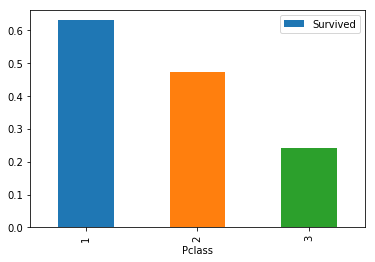

In [5]:
df = train_data[["Survived", "Pclass"]].groupby(by="Pclass", as_index=False).mean()
df.plot(x="Pclass", y="Survived",kind="bar")
df

**2.性别（Sex）**

同样，看的出来女性的幸存率高达74%，而男性仅有约19%，因此性别当然也是一个重要特征。

,Sex,Survived
0,female,0.742038
1,male,0.188908


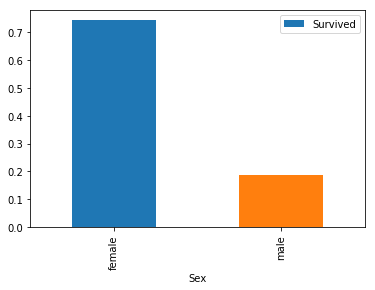

In [6]:
df = train_data[["Survived", "Sex"]].groupby(by="Sex", as_index=False).mean()
df.plot(x="Sex", y="Survived",kind="bar")
df

**3. 年龄**

第二个折线图可以大概看出，约10岁以下的儿童和80左右以上的高龄老人幸存率较高。第一幅图中可以看出约在14岁或者18岁以下的未成年人是有相对较高幸存率，而中间年龄段的成年人幸存率表现一般。

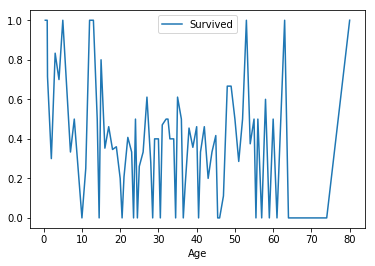

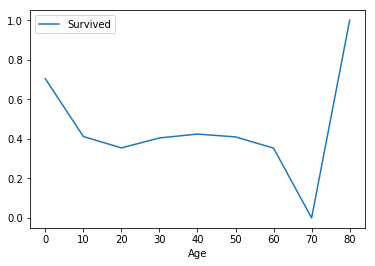

In [7]:
df = train_data[["Survived", "Age"]].groupby(by="Age", as_index=False).mean()
df.plot(x="Age", y="Survived",kind="line")
# 对年龄进行年龄段切分
df = train_data[["Survived", "Age"]].copy()
df["Age"] = df["Age"].round(-1)
df = df.groupby(by="Age", as_index=False).mean()
df.plot(x="Age", y="Survived",kind="line")

**4.配偶及兄弟姐妹（SibSp）**

SibSp 在1或2的情况下，幸存率约能达到50%左右，而没有SibSp或者3个以上SibSp则幸存率较低。

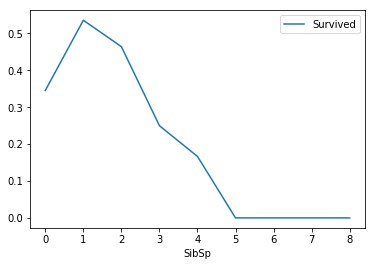

In [8]:
df = train_data[["Survived", "SibSp"]].groupby(by="SibSp", as_index=False).mean()
df.plot(x="SibSp", y="Survived",kind="line")

**5.父母及子女（Parch）**

同样的方法，可以看出子女及父母人数在1-3人之间的幸存率会高于50%，而没有Parch或者4个以上的幸存率极低。

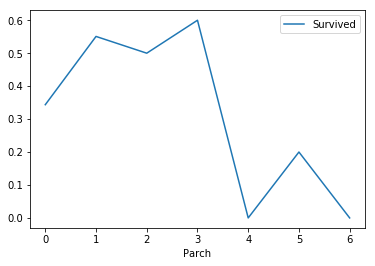

In [9]:
df = train_data[["Survived", "Parch"]].groupby(by="Parch", as_index=False).mean()
df.plot(x="Parch", y="Survived",kind="line")

**6.父母及子女（Parch+SibSp）**

使用Parch和SibSp两个特征构造出一个乘客出游团体的大小，即FamilySize，可以看出构建出的FamilySize可以在幸存率上有更大的区分，如3个FamilySize的幸存率能高达70%左右，没有亲人伴随和4个以上大家庭的新村率很低。

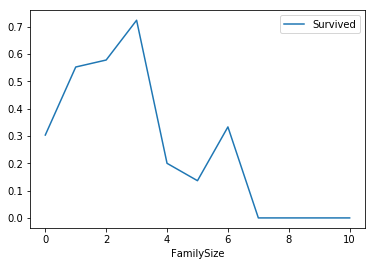

In [10]:
df = train_data[["Survived", "Parch", "SibSp"]].copy()
df["FamilySize"] = df["Parch"] + df["SibSp"]
df = df[["Survived", "FamilySize"]].groupby(by="FamilySize", as_index=False).mean()
df.plot(x="FamilySize", y="Survived",kind="line")

**7.共票号（Ticket）**

一般来讲年龄较小的乘客有可能会免票，那么就可能存在多个乘客共票的情况，又或者有双人联票的情况，那么可以看看共票和个人单票这两部分乘客的幸存率是否不同。同票号在2人或3人的情况下，幸存率也会高于50%，那么对票号处理也应该可以做为一个特征进行输入。

1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: PassengerId, dtype: int64
             Ticket  Survived  Together_num
0         A/5 21171         0             1
1          PC 17599         1             1
2  STON/O2. 3101282         1             1
3            113803         1             2
4            373450         0             1


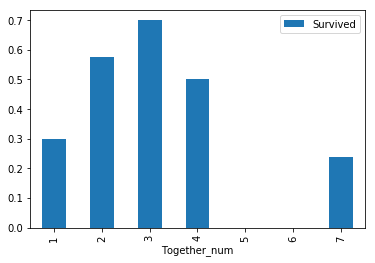

In [11]:
df = train_data[["Ticket","PassengerId"]].groupby("Ticket", as_index=False).count()
print(df["PassengerId"].value_counts())

# 对比幸存率
df2 = train_data[["Ticket","Survived"]].copy()
df_all = df2.merge(df, how="left", on='Ticket')
df_all.columns = ["Ticket", "Survived", "Together_num"]
print(df_all.head())
df_all = df_all[["Survived", "Together_num"]].groupby("Together_num").mean()
df_all.plot(kind="bar")

**8.船票费用（Fare）**

票价简单处理，四舍五入到百位，可以看出小于100的票价幸存率极地，而高于100票价的乘客基本上是票价越贵，幸存率越高。

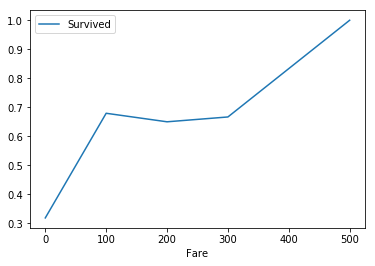

In [12]:
df = train_data[["Survived", "Fare"]].copy()
df["Fare"] = df["Fare"].round(-2)
df = df.groupby(by="Fare", as_index=False).mean()
df.plot(x="Fare", y="Survived",kind="line")

**9.不同仓位的乘客幸存率不同**

简单处理，对比Cabin为NULL和部位NULL 的乘客幸存率。

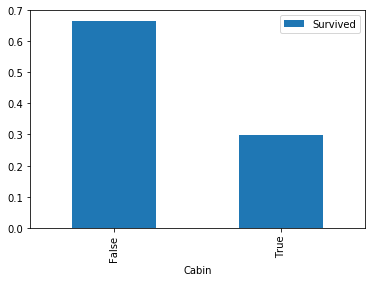

In [13]:
df = train_data[["Survived", "Cabin"]].copy()
df["Cabin"] = df["Cabin"].isnull()
df = df.groupby(by="Cabin").mean()
df.plot(kind="bar")

**10.对比不同登船口岸的乘客幸存率**

简单处理，对比Cabin为NULL和部位NULL 的乘客幸存率。

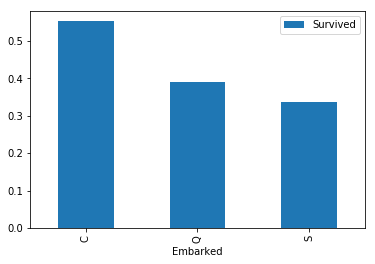

In [16]:
df = train_data[["Survived", "Embarked"]].groupby(by="Embarked").mean()
df.plot(kind="bar")